In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import files
uploaded = files.upload()

Saving pokemon.csv to pokemon.csv


In [0]:
import io
data_pok_kNN = pd.read_csv(io.BytesIO(uploaded['pokemon.csv']))

data_pok_kNN.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [0]:
data_pok_kNN.isna().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [0]:
data_pok_kNN.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [0]:
data_pok_kNN.shape

(800, 12)

In [0]:
data_pok_kNN['Type 2'].fillna((data_pok_kNN['Type 2'].mode()[0]), inplace=True)

In [0]:
data_pok_kNN.isna().sum()

#             0
Name          1
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [0]:
data_pok_kNN.dropna(inplace=True)

In [0]:
data_pok_kNN1 = data_pok_kNN.drop(["#", "Type 1", "Type 2",'Legendary'], 1)

In [0]:
data_pok_kNN1

,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,Bulbasaur,45,49,49,65,65,45,1
1,Ivysaur,60,62,63,80,80,60,1
2,Venusaur,80,82,83,100,100,80,1
3,Mega Venusaur,80,100,123,122,120,80,1
4,Charmander,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...
795,Diancie,50,100,150,100,150,50,6
796,Mega Diancie,50,160,110,160,110,110,6
797,Hoopa Confined,80,110,60,150,130,70,6
798,Hoopa Unbound,80,160,60,170,130,80,6


### Preprocessing

In [0]:
X = data_pok_kNN1.drop(['Name'], axis=1)
y = data_pok_kNN1['Name']

### Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Training and Predictions

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
#  X_test1 = data_pok_kNN1[data_pok_kNN1.Name == "Mewtwo"].drop(columns = 'Name')

In [0]:
y_pred = classifier.predict(X_test)


In [0]:
print(classifier.score(X_test, y_test))

0.0


### Evaluating the Algorithm

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Comparing Error Rate with the K Value

In [0]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

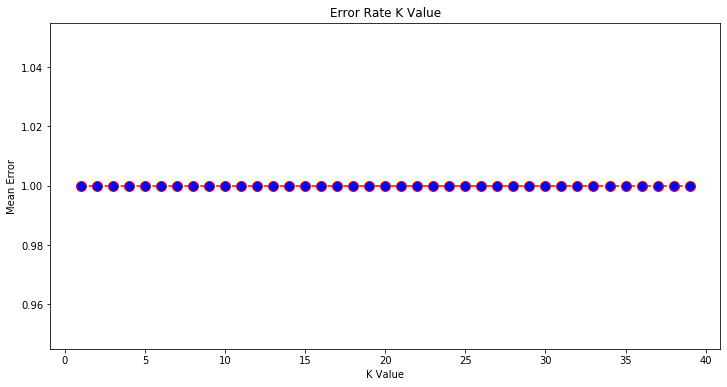

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')